# Implementing the Power Socket

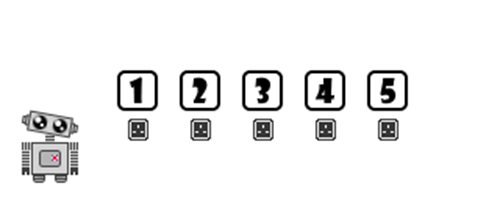

In [1]:
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.core.pylabtools import figsize
import warnings
warnings.filterwarnings('ignore')

In [2]:
class PowerSocket:
    """ the base power socket class """

    def __init__(self, q):
        self.q = q        # the true reward value
        self.initialize() # reset the socket

    def initialize(self):
        self.Q = 0   # the estimate of this socket's reward value
        self.n = 0   # the number of times this socket has been tried

    def charge(self):
        """ return a random amount of charge """

        # the reward is a guassian distribution with unit variance around the true
        # value 'q'
        value = np.random.randn() + self.q

        # never allow a charge less than 0 to be returned
        return 0 if value < 0 else value

    def update(self,R):
        """ update this socket after it has returned reward value 'R' """

        # increment the number of times this socket has been tried
        self.n += 1

        # the new estimate of the mean is calculated from the old estimate
        self.Q = (1 - 1.0/self.n) * self.Q + (1.0/self.n) * R

    def sample(self):
        """ return an estimate of the socket's reward value """
        return self.Q

- q = the true mean value of the socket output
- Q = the running estimate of the socket output (i.e. its reward)
- n = the number of times the socket has been tried


## 1st Graph

In [3]:
# create 5 sockets in a fixed order
socket_order = [2,1,3,5,4]

# create the sockets
# - the mean value of each socket is derived from the socket order index, which is doubled to give
#   distinct values and offset by 2 to keep the distribution above zero
sockets = [PowerSocket((q*2)+2) for q in socket_order]

# save the number of sockets
NUM_SOCKETS = len(socket_order)

In [4]:
# using a very large number of time steps just to create sufficient data to get smooth plots of socket output
TOTAL_STEPS = 5

# rewards will contain the charge returned at all of the time steps for each socket
rewards = np.zeros(shape=(TOTAL_STEPS,NUM_SOCKETS))

# iterate through each of the sockets
for socket_number,socket in enumerate(sockets):

    # get charge from the socket for the defined number of steps
    for t in range(TOTAL_STEPS): rewards[t,socket_number] = socket.charge()
    print(f"rewards for socket {socket_number+1}: {rewards[:,socket_number]}")

rewards for socket 1: [5.88669796 7.08373729 6.64744891 4.8593586  5.93751498]
rewards for socket 2: [3.80192563 1.91325555 4.5298415  5.38266249 4.26161903]
rewards for socket 3: [7.66772704 6.62394196 7.62575017 8.66095342 6.17754042]
rewards for socket 4: [11.14706163 12.37531706 11.46640781 11.37387616 12.61882419]
rewards for socket 5: [ 8.84463288 11.46116748  9.97542877  9.9911761  10.62429793]


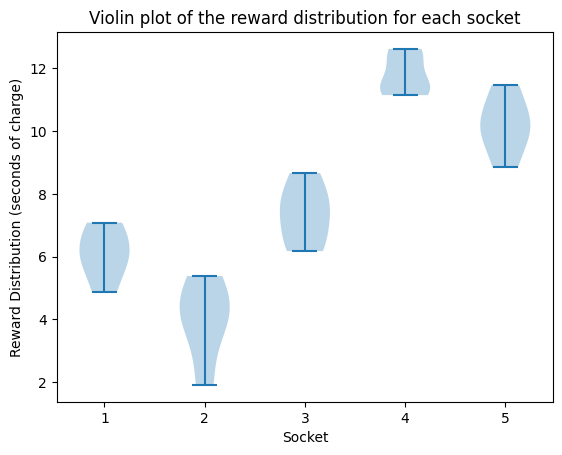

In [5]:
# plot the charge we got from the sockets
plt.violinplot(rewards)
plt.xlabel('Socket')
plt.ylabel('Reward Distribution (seconds of charge)')
plt.title('Violin plot of the reward distribution for each socket')
plt.show()

Text(0, 0.5, 'Density')

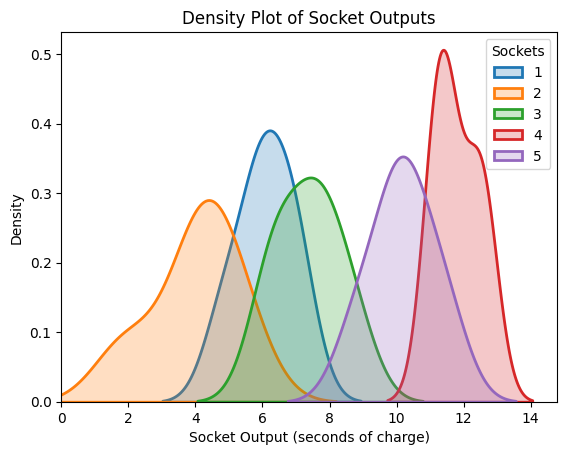

In [6]:
# iterate through the sockets to draw each plot
# (from: https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0)
for socket_number in range(NUM_SOCKETS):
    sns.distplot(pd.DataFrame(rewards[:,socket_number]), hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 2},
                 label = f'{socket_number+1}');

# Plot formatting
plt.xlim(0, None)
plt.legend(title = 'Sockets')
plt.title('Density Plot of Socket Outputs')
plt.xlabel('Socket Output (seconds of charge)')
plt.ylabel('Density')

## 2nd graph 

rewards for socket 1: [45.17843083 41.81754438 45.38789687 ... 43.21100532 44.85700455
 43.95702724]
rewards for socket 2: [23.28088221 23.18654625 23.54404656 ... 24.12684871 24.40175056
 25.36358553]
rewards for socket 3: [64.22432595 64.19857722 62.59357927 ... 64.62193928 64.00039689
 64.01626784]
rewards for socket 4: [103.52685178 103.71508488 103.52234873 ... 102.63936412 103.91452961
 104.24542542]
rewards for socket 5: [83.08443983 84.43348591 83.40057111 ... 84.16695124 82.24100528
 84.79344729]


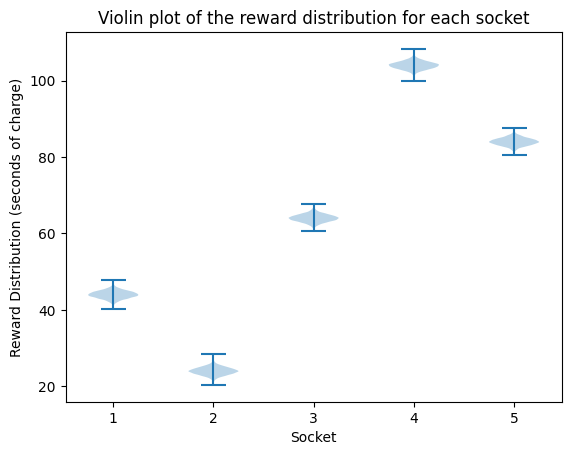

Text(0, 0.5, 'Density')

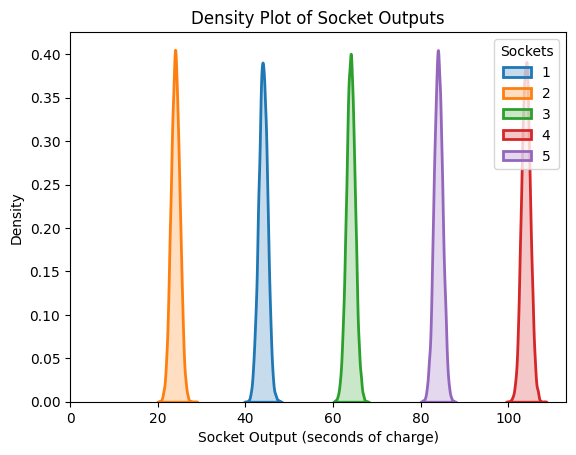

In [7]:
# create 5 sockets in a fixed order
socket_order = [21,11,31,51,41]


# create the sockets
# - the mean value of each socket is derived from the socket order index, which is doubled to give
#   distinct values and offset by 2 to keep the distribution above zero
sockets = [PowerSocket((q*2)+2) for q in socket_order]

# save the number of sockets
NUM_SOCKETS = len(socket_order)

# using a very large number of time steps just to create sufficient data to get smooth plots of socket output
TOTAL_STEPS = 10000

# rewards will contain the charge returned at all of the time steps for each socket
rewards = np.zeros(shape=(TOTAL_STEPS,NUM_SOCKETS))

# iterate through each of the sockets
for socket_number,socket in enumerate(sockets):

    # get charge from the socket for the defined number of steps
    for t in range(TOTAL_STEPS): rewards[t,socket_number] = socket.charge()
    print(f"rewards for socket {socket_number+1}: {rewards[:,socket_number]}")


# plot the charge we got from the sockets
plt.violinplot(rewards)
plt.xlabel('Socket')
plt.ylabel('Reward Distribution (seconds of charge)')
plt.title('Violin plot of the reward distribution for each socket')
plt.show()



# iterate through the sockets to draw each plot
# (from: https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0)
for socket_number in range(NUM_SOCKETS):
    sns.distplot(pd.DataFrame(rewards[:,socket_number]), hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 2},
                 label = f'{socket_number+1}');

# Plot formatting
plt.xlim(0, None)
plt.legend(title = 'Sockets')
plt.title('Density Plot of Socket Outputs')
plt.xlabel('Socket Output (seconds of charge)')
plt.ylabel('Density')

## 3rd Graph

rewards for socket 1: [423.15438868 421.94396448 424.35151983 ... 425.07956576 423.34628635
 423.31776962]
rewards for socket 2: [222.88577712 225.42751905 224.05791828 ... 224.63300378 224.09184195
 225.13579153]
rewards for socket 3: [623.37932154 624.72658501 624.0860652  ... 624.16179811 623.44808054
 624.83957152]
rewards for socket 4: [1023.94507799 1022.97869192 1024.28234798 ... 1022.87623455 1024.51152358
 1025.95313069]
rewards for socket 5: [823.55096542 825.33931822 824.5819399  ... 823.26010884 823.45477586
 824.0478263 ]


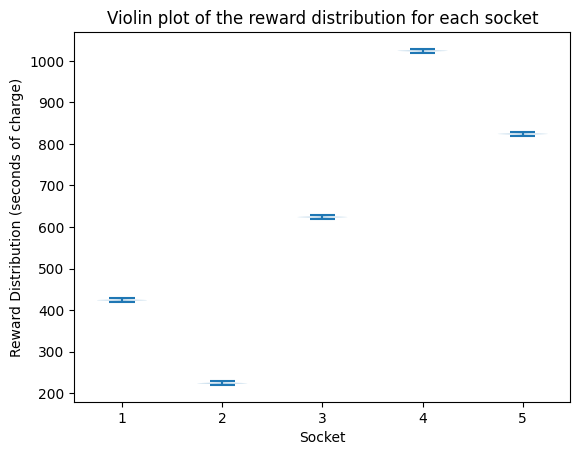

Text(0, 0.5, 'Density')

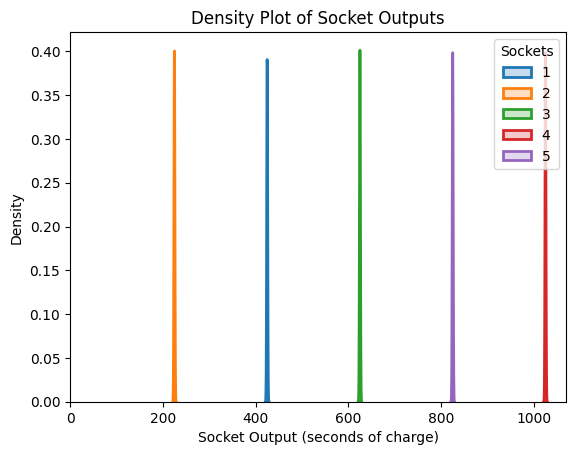

In [8]:
# create 5 sockets in a fixed order
socket_order = [211,111,311,511,411]


# create the sockets
# - the mean value of each socket is derived from the socket order index, which is doubled to give
#   distinct values and offset by 2 to keep the distribution above zero
sockets = [PowerSocket((q*2)+2) for q in socket_order]

# save the number of sockets
NUM_SOCKETS = len(socket_order)

# using a very large number of time steps just to create sufficient data to get smooth plots of socket output
TOTAL_STEPS = 100000

# rewards will contain the charge returned at all of the time steps for each socket
rewards = np.zeros(shape=(TOTAL_STEPS,NUM_SOCKETS))

# iterate through each of the sockets
for socket_number,socket in enumerate(sockets):

    # get charge from the socket for the defined number of steps
    for t in range(TOTAL_STEPS): rewards[t,socket_number] = socket.charge()
    print(f"rewards for socket {socket_number+1}: {rewards[:,socket_number]}")


# plot the charge we got from the sockets
plt.violinplot(rewards)
plt.xlabel('Socket')
plt.ylabel('Reward Distribution (seconds of charge)')
plt.title('Violin plot of the reward distribution for each socket')
plt.show()



# iterate through the sockets to draw each plot
# (from: https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0)
for socket_number in range(NUM_SOCKETS):
    sns.distplot(pd.DataFrame(rewards[:,socket_number]), hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 2},
                 label = f'{socket_number+1}');

# Plot formatting
plt.xlim(0, None)
plt.legend(title = 'Sockets')
plt.title('Density Plot of Socket Outputs')
plt.xlabel('Socket Output (seconds of charge)')
plt.ylabel('Density')


## 4th Graph

rewards for socket 1: [10.92318032 10.36884991 10.75867061 ...  9.82307291  8.86514851
  9.70669028]
rewards for socket 2: [6.03180853 5.57077301 3.79581781 ... 4.10959224 1.62829755 4.94017518]
rewards for socket 3: [12.12181689 14.34250454 11.71911384 ... 11.4160551  12.46485311
 12.25269948]
rewards for socket 4: [16.70069258 17.32270184 18.81332588 ... 17.55656266 20.0732655
 16.82199973]
rewards for socket 5: [20.38406141 21.93790091 19.93761    ... 17.82523341 19.59132051
 20.06388605]
rewards for socket 6: [10.12442948  9.14053549  7.66009589 ... 10.35468772  7.31004466
  7.29072445]
rewards for socket 7: [5.58268064 6.39170745 5.075624   ... 6.3713871  5.32596592 6.83279875]


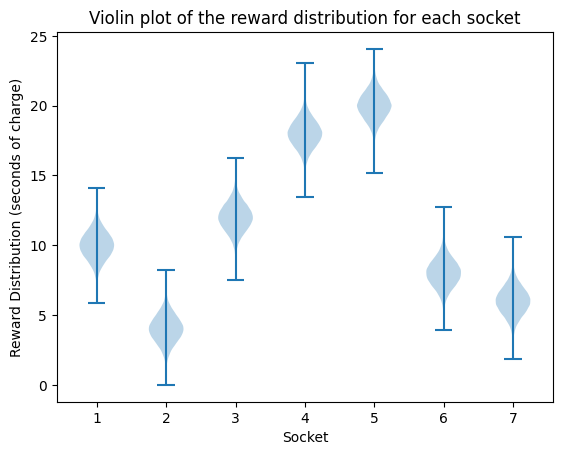

Text(0, 0.5, 'Density')

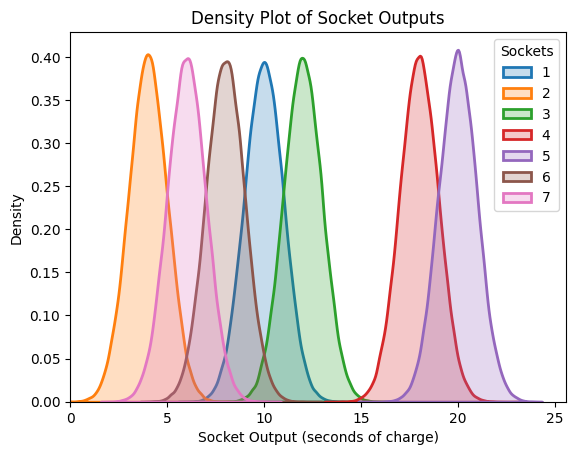

In [9]:
# create 5 sockets in a fixed order
socket_order = [4,1,5,8,9,3,2]


# create the sockets
# - the mean value of each socket is derived from the socket order index, which is doubled to give
#   distinct values and offset by 2 to keep the distribution above zero
sockets = [PowerSocket((q*2)+2) for q in socket_order]

# save the number of sockets
NUM_SOCKETS = len(socket_order)

# using a very large number of time steps just to create sufficient data to get smooth plots of socket output
TOTAL_STEPS = 100000

# rewards will contain the charge returned at all of the time steps for each socket
rewards = np.zeros(shape=(TOTAL_STEPS,NUM_SOCKETS))

# iterate through each of the sockets
for socket_number,socket in enumerate(sockets):

    # get charge from the socket for the defined number of steps
    for t in range(TOTAL_STEPS): rewards[t,socket_number] = socket.charge()
    print(f"rewards for socket {socket_number+1}: {rewards[:,socket_number]}")


# plot the charge we got from the sockets
plt.violinplot(rewards)
plt.xlabel('Socket')
plt.ylabel('Reward Distribution (seconds of charge)')
plt.title('Violin plot of the reward distribution for each socket')
plt.show()



# iterate through the sockets to draw each plot
# (from: https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0)
for socket_number in range(NUM_SOCKETS):
    sns.distplot(pd.DataFrame(rewards[:,socket_number]), hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 2},
                 label = f'{socket_number+1}');

# Plot formatting
plt.xlim(0, None)
plt.legend(title = 'Sockets')
plt.title('Density Plot of Socket Outputs')
plt.xlabel('Socket Output (seconds of charge)')
plt.ylabel('Density')


## 5th Graph

rewards for socket 1: [40.13264097 39.54016403 38.56084253 ... 39.5388612  42.86633501
 40.57684341]
rewards for socket 2: [45.97866291 43.75636067 43.49024081 ... 43.57340615 42.16770564
 44.1752648 ]
rewards for socket 3: [66.50324557 65.24130358 67.00519307 ... 65.8744297  65.38726071
 66.27488616]
rewards for socket 4: [87.97863066 87.73510668 88.30627257 ... 87.0031087  87.22643176
 88.06908862]
rewards for socket 5: [15.48475121 14.69808911 14.5959341  ... 12.24135513 13.55515704
 14.27445911]
rewards for socket 6: [11.8719861  11.57225945 10.16091637 ... 12.78422089 12.58504431
 10.97943062]
rewards for socket 7: [4.70250088 4.55334319 4.39146235 ... 5.62181882 3.12143176 4.12797023]
rewards for socket 8: [19.02156477 21.99843681 18.22962156 ... 19.05566279 19.03422489
 18.89886949]


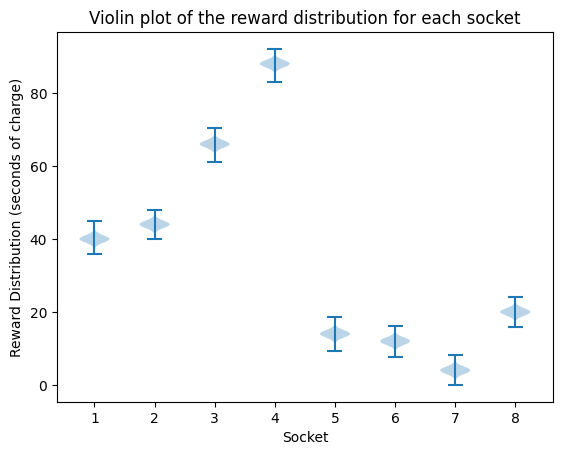

Text(0, 0.5, 'Density')

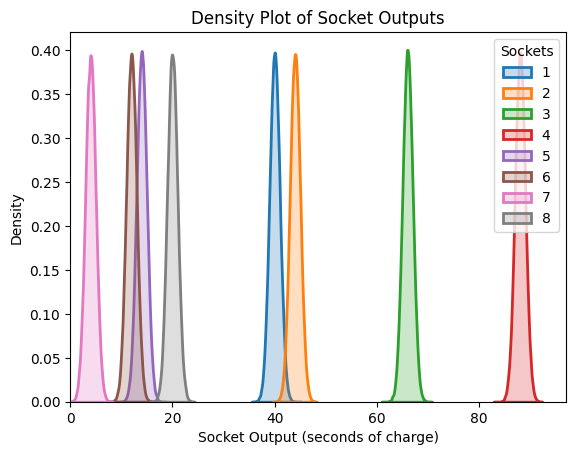

In [10]:
# create 5 sockets in a fixed order
socket_order = [19,21,32,43,6,5,1,9]


# create the sockets
# - the mean value of each socket is derived from the socket order index, which is doubled to give
#   distinct values and offset by 2 to keep the distribution above zero
sockets = [PowerSocket((q*2)+2) for q in socket_order]

# save the number of sockets
NUM_SOCKETS = len(socket_order)

# using a very large number of time steps just to create sufficient data to get smooth plots of socket output
TOTAL_STEPS = 100000

# rewards will contain the charge returned at all of the time steps for each socket
rewards = np.zeros(shape=(TOTAL_STEPS,NUM_SOCKETS))

# iterate through each of the sockets
for socket_number,socket in enumerate(sockets):

    # get charge from the socket for the defined number of steps
    for t in range(TOTAL_STEPS): rewards[t,socket_number] = socket.charge()
    print(f"rewards for socket {socket_number+1}: {rewards[:,socket_number]}")


# plot the charge we got from the sockets
plt.violinplot(rewards)
plt.xlabel('Socket')
plt.ylabel('Reward Distribution (seconds of charge)')
plt.title('Violin plot of the reward distribution for each socket')
plt.show()



# iterate through the sockets to draw each plot
# (from: https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0)
for socket_number in range(NUM_SOCKETS):
    sns.distplot(pd.DataFrame(rewards[:,socket_number]), hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 2},
                 label = f'{socket_number+1}');

# Plot formatting
plt.xlim(0, None)
plt.legend(title = 'Sockets')
plt.title('Density Plot of Socket Outputs')
plt.xlabel('Socket Output (seconds of charge)')
plt.ylabel('Density')